# Mini Projet Analyse des données

## DATASET
Le dataset contient des données dates

Pour installer les bibliothéque `numby`,
`matplotlib` et `pandas` taper les commandes suivantes dans une cellule code de jupyter ou dans un terminal anaconda prompt
pip install pandas numby matplolib

Importer DATASET

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
print(df.shape)


(1309, 12)


In [12]:
#df.describe(include='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### Quel sexe a le plus de chances de survie ?
* Comparaison de la proportion d’hommes et de femmes passagers du Titanic qui ont survécu

* Utilisons groupby, qui permet de produire des tables de synthèses par catégories:

In [14]:
df.groupby(['Sex','Survived']).count()['PassengerId']

Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: PassengerId, dtype: int64

In [15]:
passengers = df.groupby('Sex')['PassengerId'].count()
passengers

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [16]:
survivors = df.groupby('Sex')['Survived'].sum()
survivors

Sex
female    233.0
male      109.0
Name: Survived, dtype: float64

In [17]:
summary = pd.DataFrame({"Survivants": survivors,
                        "Passagers": passengers,
                        "%": round(100*survivors / passengers,1)})
summary

,Survivants,Passagers,%
Sex,,,
female,233.0,466,50.0
male,109.0,843,12.9


## Visualisation

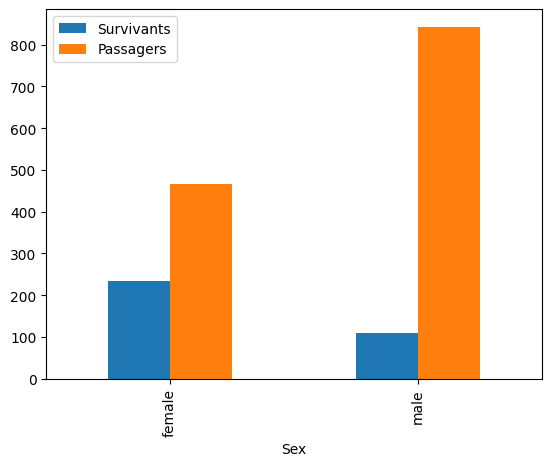

In [18]:
import matplotlib.pyplot as plt
summary[["Survivants", "Passagers"]].plot(kind='bar');

Le même graphique, avec titre et labels:

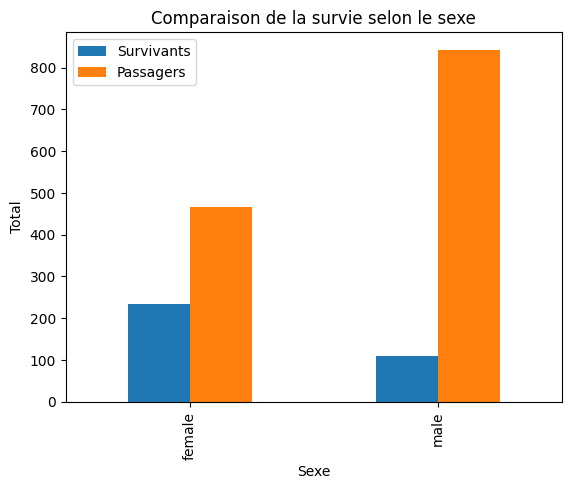

In [19]:
summary[["Survivants", "Passagers"]].plot(kind='bar');
plt.xlabel('Sexe')
plt.ylabel('Total')
plt.title('Comparaison de la survie selon le sexe');